In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

In [ ]:
df = pd.read_csv("HUERTO-ESP32 - huerto_casa.csv")

In [ ]:
df

,timestamp,light_air,light_ground,moisture_ground,dht_air_humidity,dht_air_temperature,dht_ground_humidity,dht_ground_temperature
0,1697063380,2311,1999,944,40,24.4,40,24.3
1,1697063416,2325,2006,929,40,24.3,40,24.3
2,1697063450,2320,2003,952,40,24.3,40,24.3
3,1697063484,2329,1999,950,40,24.3,40,24.2
4,1697063518,2307,1983,961,40,24.3,40,24.2
...,...,...,...,...,...,...,...,...
9450,1697394023,0,0,1462,58,21.8,60,21.2
9451,1697394057,0,0,1569,58,21.8,60,21.2
9452,1697394090,777,437,1525,58,21.8,60,21.2
9453,1697394123,912,688,1530,58,21.8,60,21.2


In [ ]:
profile = ProfileReport(df, tsmode=True, title="Time-Series garden EDA")

In [ ]:
# profile.to_file("report_timeseries.html")

In [ ]:
df.isnull().sum()

timestamp                 0
light_air                 0
light_ground              0
moisture_ground           0
dht_air_humidity          0
dht_air_temperature       0
dht_ground_humidity       0
dht_ground_temperature    0
dtype: int64

In [ ]:
df[df["timestamp"] == 'estoy en la habitación, me voy a dormir, he cerrado la ventana']

,timestamp,light_air,light_ground,moisture_ground,dht_air_humidity,dht_air_temperature,dht_ground_humidity,dht_ground_temperature


In [ ]:
value_to_drop = 'estoy en la habitación, me voy a dormir, he cerrado la ventana'
df = df[df["timestamp"] != value_to_drop]

In [ ]:
df

,timestamp,light_air,light_ground,moisture_ground,dht_air_humidity,dht_air_temperature,dht_ground_humidity,dht_ground_temperature
0,1697063380,2311,1999,944,40,24.4,40,24.3
1,1697063416,2325,2006,929,40,24.3,40,24.3
2,1697063450,2320,2003,952,40,24.3,40,24.3
3,1697063484,2329,1999,950,40,24.3,40,24.2
4,1697063518,2307,1983,961,40,24.3,40,24.2
...,...,...,...,...,...,...,...,...
9450,1697394023,0,0,1462,58,21.8,60,21.2
9451,1697394057,0,0,1569,58,21.8,60,21.2
9452,1697394090,777,437,1525,58,21.8,60,21.2
9453,1697394123,912,688,1530,58,21.8,60,21.2


Column: light_air
ADF Statistic: -3.303761044618928
p-value: 0.01471119046848116
Critical Values:
	1%: -3.43104423503182
	5%: -2.86184680851463
	10%: -2.566933309077906


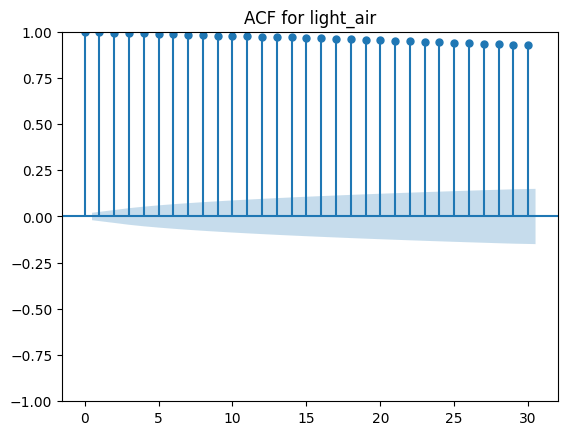

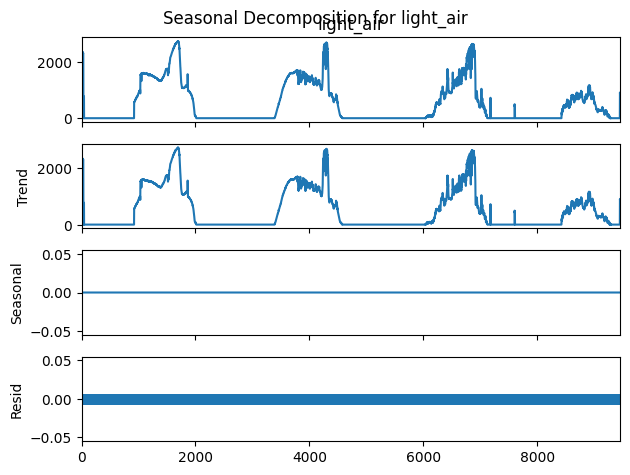

light_air is both stationary and seasonal.
Column: light_ground
ADF Statistic: -2.4201743221225405
p-value: 0.13612312434196827
Critical Values:
	1%: -3.431044161337213
	5%: -2.861846775950022
	10%: -2.5669332917436476


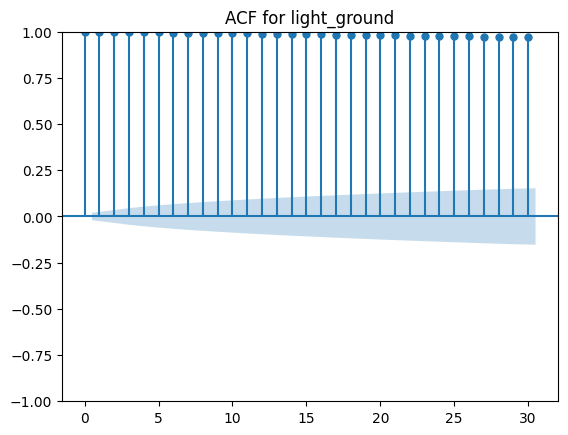

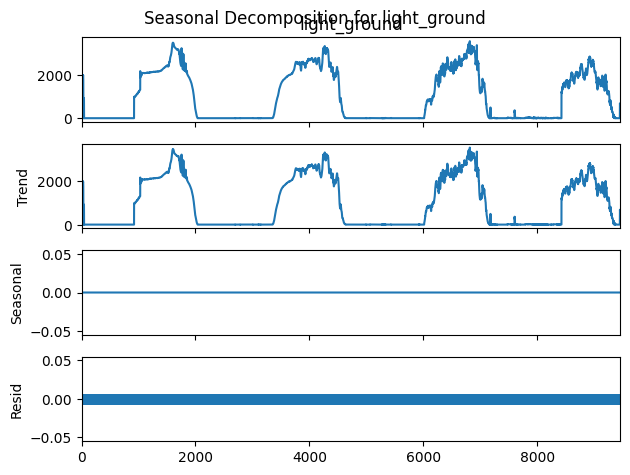

light_ground is seasonal but not stationary.
Column: moisture_ground
ADF Statistic: -6.299849995990852
p-value: 3.433445024414418e-08
Critical Values:
	1%: -3.4310445299667913
	5%: -2.8618469388422256
	10%: -2.5669333784517576


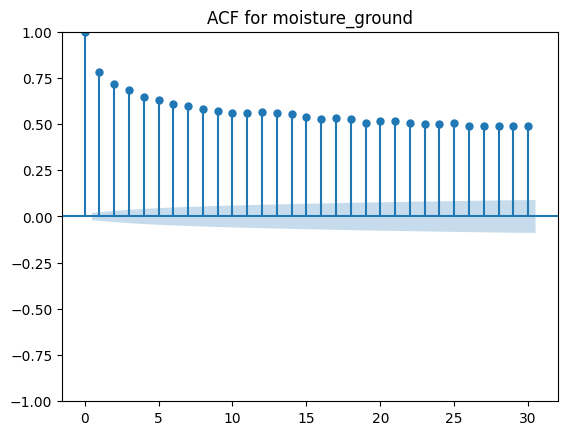

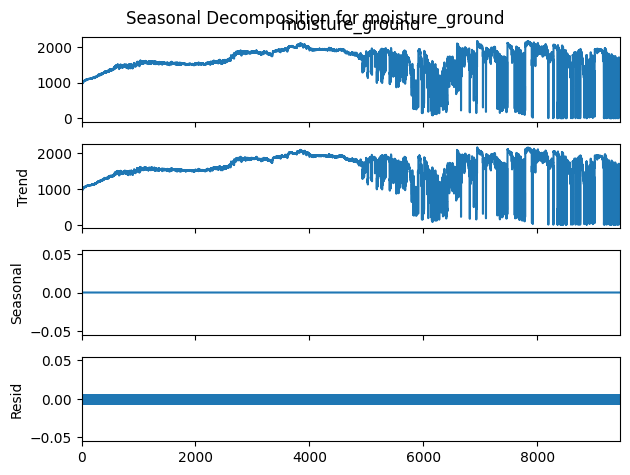

moisture_ground is both stationary and seasonal.
Column: dht_air_humidity
ADF Statistic: -0.4132902006763025
p-value: 0.9078560294157297
Critical Values:
	1%: -3.431043719497917
	5%: -2.8618465807074513
	10%: -2.566933187815325


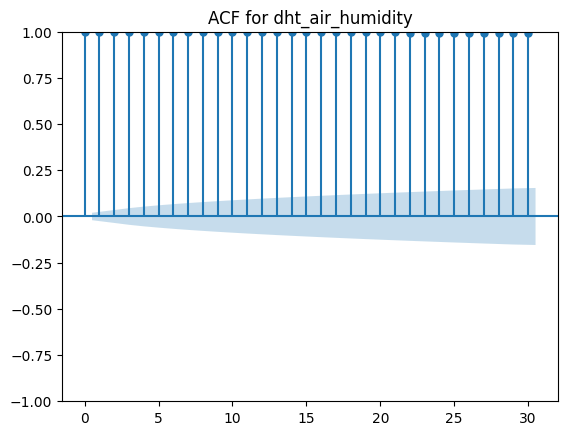

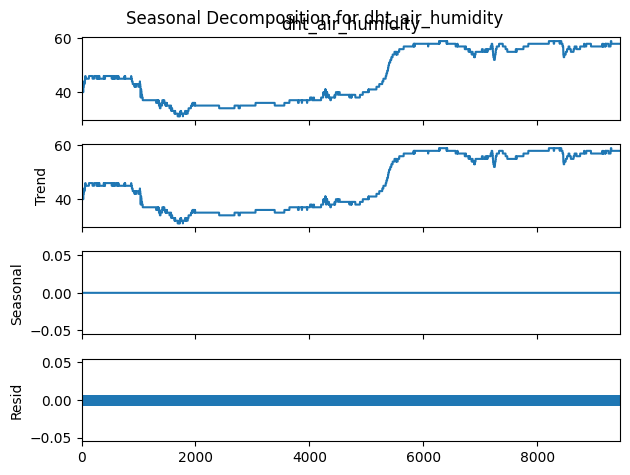

dht_air_humidity is seasonal but not stationary.
Column: dht_air_temperature
ADF Statistic: -2.753983459499119
p-value: 0.06515347025154934
Critical Values:
	1%: -3.43104423503182
	5%: -2.86184680851463
	10%: -2.566933309077906


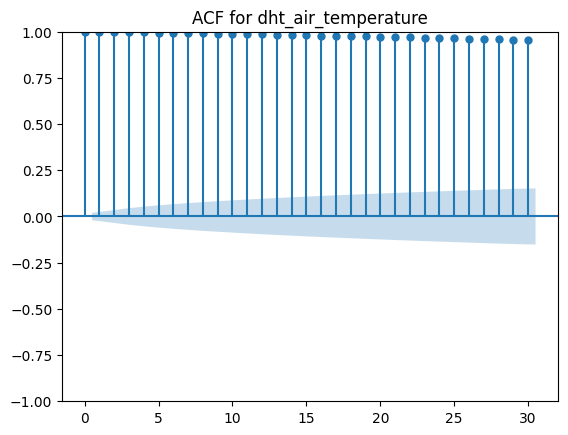

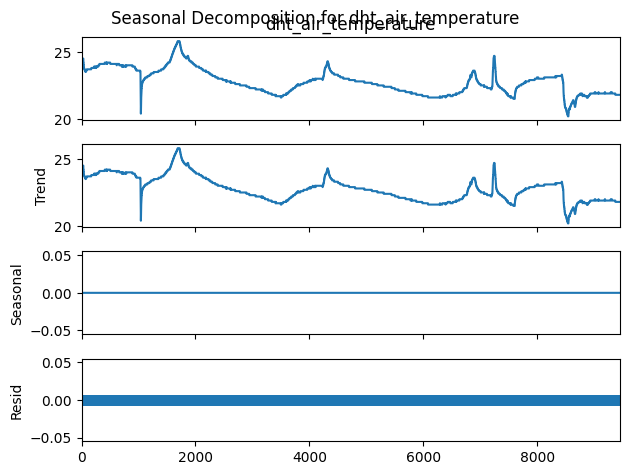

dht_air_temperature is seasonal but not stationary.
Column: dht_ground_humidity
ADF Statistic: -0.6541432016641792
p-value: 0.858272730867544
Critical Values:
	1%: -3.4310438667151724
	5%: -2.8618466457606893
	10%: -2.566933222443397


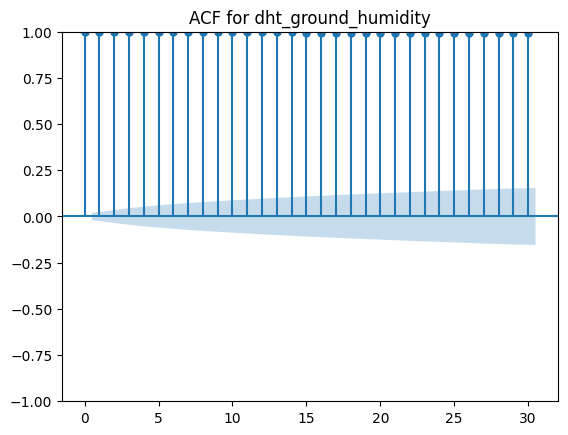

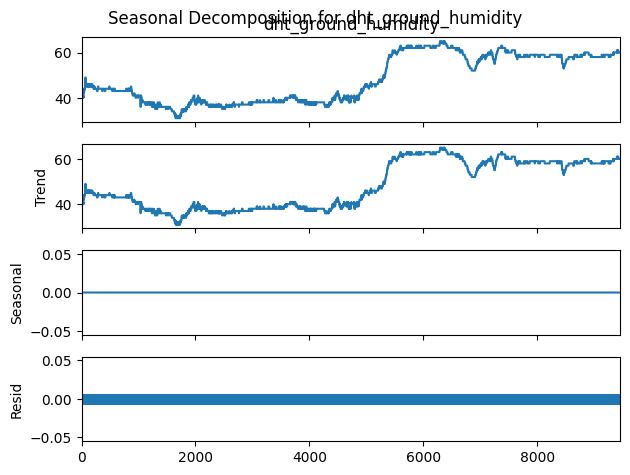

dht_ground_humidity is seasonal but not stationary.
Column: dht_ground_temperature
ADF Statistic: -2.8041910871849565
p-value: 0.05767759050084028
Critical Values:
	1%: -3.4310426907236944
	5%: -2.86184612610648
	10%: -2.566932945829612


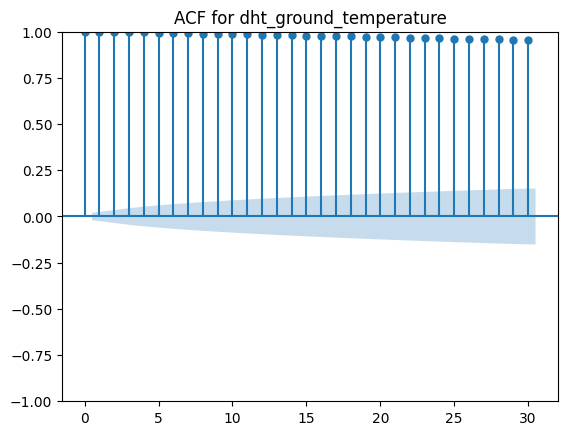

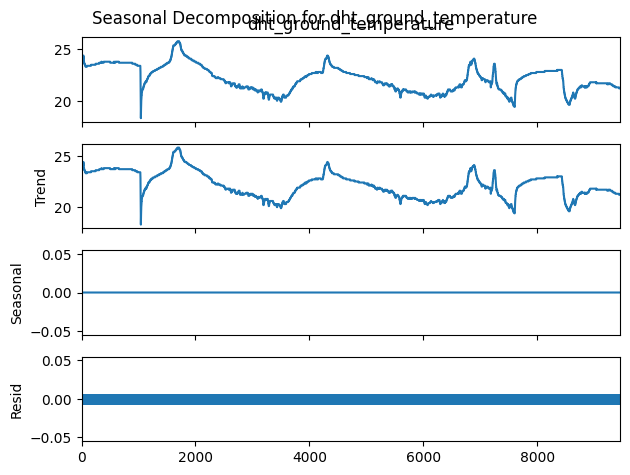

dht_ground_temperature is seasonal but not stationary.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose


for column in df.columns[1:]:  # exclude the timestamp column
    result = adfuller(df[column])
    print(f'Column: {column}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # plot ACF for each column to visualize autocorrelation
    plot_acf(df[column], lags=30)
    plt.title(f'ACF for {column}')
    plt.show()

    # check for seasonality
    decomposition = seasonal_decompose(df[column], model='additive', period=1)  # No seasonal period for now
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition for {column}')
    plt.show()

    # Check if the series is stationary or seasonal based on ADF p-value and decomposition
    is_stationary = result[1] < 0.05  # ADF p-value less than 0.05 indicates stationarity
    is_seasonal = decomposition.seasonal is not None  # If seasonal component exists

    if is_stationary and is_seasonal:
        print(f'{column} is both stationary and seasonal.')
    elif is_stationary:
        print(f'{column} is stationary but not seasonal.')
    elif is_seasonal:
        print(f'{column} is seasonal but not stationary.')
    else:
        print(f'{column} is neither stationary nor seasonal.')

In [ ]:
from statsmodels.tsa.stattools import kpss

for column in df.columns[1:]:  # Exclude the timestamp column
    result = kpss(df[column])
    print(f'Column: {column}')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')

    # Interpret the KPSS test results
    significance_level = 0.05
    is_stationary = result[1] < significance_level
    if is_stationary:
        print(f'{column} is stationary according to the KPSS test.\n')
    else:
        print(f'{column} contains trend according to the KPSS test.\n')

Column: light_air
KPSS Statistic: 0.6200745917350889
p-value: 0.020811400751355548
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
light_air is stationary according to the KPSS test.

Column: light_ground
KPSS Statistic: 0.2684501522235638
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
light_ground contains trend according to the KPSS test.

Column: moisture_ground
KPSS Statistic: 1.131272964139343
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
moisture_ground is stationary according to the KPSS test.

Column: dht_air_humidity
KPSS Statistic: 11.959757392635856
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
dht_air_humidity is stationary according to the KPSS test.

Column: dht_air_temperature
KPSS Statistic: 7.22701692408816
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
dht_air_temperature is stationary according to the KPSS test.

Column: dht_gro

<ipython-input-63-f15a17433006>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[column])
<ipython-input-63-f15a17433006>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[column])


In [ ]:
df['diff_light_ground'] = df['light_ground'].diff(periods=3100)

result = kpss(df['diff_light_ground'].dropna())  # Drop NaN values from diff operation
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(f'\t{key}: {value}')

# Interpret the KPSS test results
significance_level = 0.05
is_stationary = result[1] < significance_level
if is_stationary:
    print('The differenced series is stationary according to the KPSS test.')
else:
    print('The differenced series contains trend according to the KPSS test.')

KPSS Statistic: 0.5354747898511061
p-value: 0.03367684913263376
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The differenced series is stationary according to the KPSS test.


In [ ]:
import matplotlib.pyplot as plt

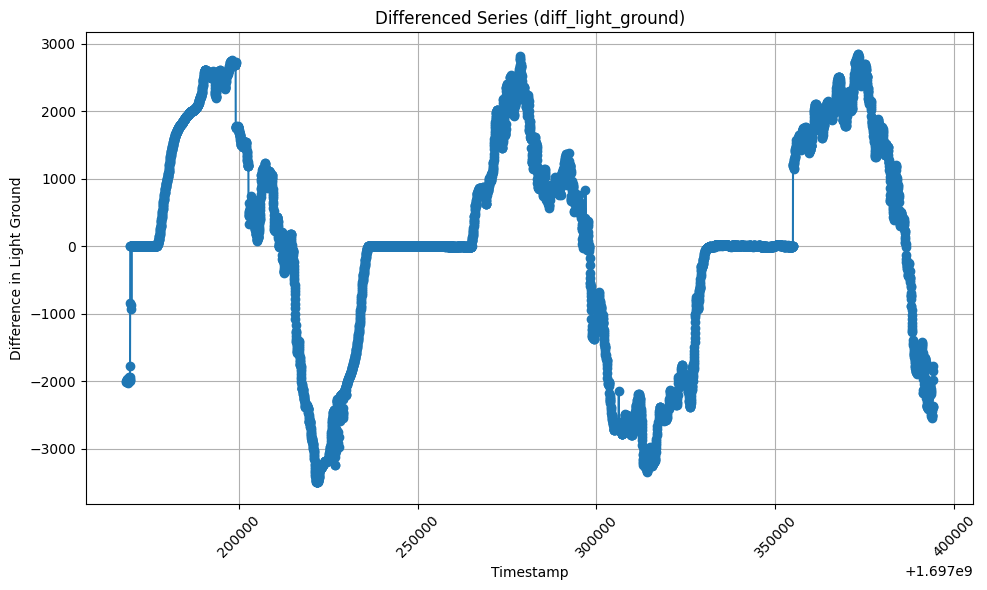

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['diff_light_ground'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Difference in Light Ground')
plt.title('Differenced Series (diff_light_ground)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df["light_ground"] = df["diff_light_ground"]

In [ ]:
df

,timestamp,light_air,light_ground,moisture_ground,dht_air_humidity,dht_air_temperature,dht_ground_humidity,dht_ground_temperature,diff_light_ground
0,1697063380,2311,NaN,944,40,24.4,40,24.3,NaN
1,1697063416,2325,NaN,929,40,24.3,40,24.3,NaN
2,1697063450,2320,NaN,952,40,24.3,40,24.3,NaN
3,1697063484,2329,NaN,950,40,24.3,40,24.2,NaN
4,1697063518,2307,NaN,961,40,24.3,40,24.2,NaN
...,...,...,...,...,...,...,...,...,...
9450,1697394023,0,-2367.0,1462,58,21.8,60,21.2,-2367.0
9451,1697394057,0,-2377.0,1569,58,21.8,60,21.2,-2377.0
9452,1697394090,777,-1971.0,1525,58,21.8,60,21.2,-1971.0
9453,1697394123,912,-1775.0,1530,58,21.8,60,21.2,-1775.0
